In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib

In [23]:
# Spécifiez le chemin du dossier contenant les fichiers CSV
dossier_csv = r"C:\Users\lcatteau\Desktop\projet 7/"

# Liste tous les fichiers dans le dossier
fichiers_csv = [fichier for fichier in os.listdir(dossier_csv) if fichier.endswith('.csv')]

# Boucle à travers chaque fichier CSV et le charge dans un DataFrame pandas
for fichier_csv in fichiers_csv:
    chemin_fichier = os.path.join(dossier_csv, fichier_csv)
    df = pd.read_csv(chemin_fichier)

    # Faites quelque chose avec le DataFrame, par exemple imprimez les premières lignes
    print(f"{fichier_csv}:")

application_test.csv:
application_train.csv:
bureau.csv:
bureau_balance.csv:
credit_card_balance.csv:
installments_payments.csv:
POS_CASH_balance.csv:
previous_application.csv:
sample_submission.csv:


In [24]:
# Liste pour stocker les DataFrames
dfs = []

# Boucle à travers chaque fichier CSV et le charge dans un DataFrame pandas
for fichier_csv in fichiers_csv:
    chemin_fichier = os.path.join(dossier_csv, fichier_csv)
    df = pd.read_csv(chemin_fichier)
    dfs.append(df)

In [25]:
dfs[1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## train

In [26]:
df_train = dfs[1]
y = df_train['TARGET']
X = df_train.drop(columns='TARGET')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [8]:
y_test_index = list(X_test["SK_ID_CURR"])
y_test.index = y_test_index
y_train_index = list(X_train["SK_ID_CURR"])
y_train.index = y_train_index

In [11]:
# on cherche les variables catégorielles
var_num_train = []
var_cat = []
for variable in X_train.columns :
    if type(X_train.iloc[71,:][variable]) == str : #variable sans nulls
        var_cat = var_cat + [variable]
    else :
        var_num_train = var_num_train +[variable]

In [12]:
# Implémentation des valeurs les plus communes pour les catégorielles
X_train[var_cat] = X_train[var_cat].apply(lambda col: col.fillna(col.mode().iloc[0]))
X_train[var_cat].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [13]:
#création de liste pour stocker les variables cat
cat = [X_train[var].mode().iloc[0] for var in var_cat]

# implémentation des données pour le test
for i in range(len(var_cat)):
    X_test.loc[X_test[var_cat[i]].isnull(),var_cat[i]]=cat[i]

In [14]:
res_cat = dict(zip(var_cat, cat))
res_cat

{'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'N',
 'FLAG_OWN_REALTY': 'Y',
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Working',
 'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
 'NAME_FAMILY_STATUS': 'Married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'OCCUPATION_TYPE': 'Laborers',
 'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
 'ORGANIZATION_TYPE': 'Business Entity Type 3',
 'FONDKAPREMONT_MODE': 'reg oper account',
 'HOUSETYPE_MODE': 'block of flats',
 'WALLSMATERIAL_MODE': 'Panel',
 'EMERGENCYSTATE_MODE': 'No'}

In [15]:
#création de liste pour stocker les variables num
ma_liste = var_num_train
elements_a_enlever = ['SK_ID_CURR', 'TARGET']

nouvelle_liste = [x for x in ma_liste if x not in elements_a_enlever]
num = [X_train[var].median() for var in nouvelle_liste]

# implémentation des données pour le test
for i in range(len(nouvelle_liste)):
    X_test.loc[X_test[nouvelle_liste[i]].isnull(),nouvelle_liste[i]]=num[i]

In [16]:
res_num = dict(zip(nouvelle_liste, num))

In [17]:
dict_imputer ={**res_num, **res_cat}
dict_imputer

{'CNT_CHILDREN': 0.0,
 'AMT_INCOME_TOTAL': 147600.0,
 'AMT_CREDIT': 513531.0,
 'AMT_ANNUITY': 24903.0,
 'AMT_GOODS_PRICE': 450000.0,
 'REGION_POPULATION_RELATIVE': 0.01885,
 'DAYS_BIRTH': -15751.0,
 'DAYS_EMPLOYED': -1214.0,
 'DAYS_REGISTRATION': -4505.0,
 'DAYS_ID_PUBLISH': -3254.0,
 'OWN_CAR_AGE': 9.0,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 1.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_CONT_MOBILE': 1.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'CNT_FAM_MEMBERS': 2.0,
 'REGION_RATING_CLIENT': 2.0,
 'REGION_RATING_CLIENT_W_CITY': 2.0,
 'HOUR_APPR_PROCESS_START': 12.0,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NOT_WORK_REGION': 0.0,
 'LIVE_REGION_NOT_WORK_REGION': 0.0,
 'REG_CITY_NOT_LIVE_CITY': 0.0,
 'REG_CITY_NOT_WORK_CITY': 0.0,
 'LIVE_CITY_NOT_WORK_CITY': 0.0,
 'EXT_SOURCE_1': 0.5060708458542889,
 'EXT_SOURCE_2': 0.5659748553897781,
 'EXT_SOURCE_3': 0.5352762504724826,
 'APARTMENTS_AVG': 0.0876,
 'BASEMENTAREA_AVG': 0.0763,
 'YEARS_BEGINEXPLUATATION_AVG': 0.9816,
 'YEARS_BUILD_AVG': 

In [18]:
X_train[nouvelle_liste] = X_train[nouvelle_liste].apply(lambda col: col.fillna(col.median()))
X_train[nouvelle_liste].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 104, dtype: int64

In [19]:
scaler = RobustScaler()

# Pipeline
pipeline_scal = Pipeline([
    ('robust_scaler', scaler)
])

In [20]:
# Normalisation
X = X_train[var_num_train].drop(columns=['SK_ID_CURR'])

# Initialisation et ajustement du scaler
scaler.fit(X)
pipeline_scal.fit(X)

# Transformation des données
transformed_data = scaler.transform(X)

# Création d'un nouveau DataFrame avec les données normalisées
normalized_df = pd.DataFrame(transformed_data, columns=X.columns, index=X.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[var_num_train].drop(columns=['SK_ID_CURR'])),
                             columns=X.columns,
                             index=X_test.index)

In [21]:
enc = OrdinalEncoder()

# Pipeline
pipeline_enc = Pipeline([
    ('ordinal_encoder', enc)
])

# Encodage des variables catégorielles
enc.fit(X_train[var_cat])
pipeline_enc.fit(X_train[var_cat])

X_train[var_cat] = enc.transform(X_train[var_cat])
X_test[var_cat] = enc.transform(X_test[var_cat])


In [23]:
tmp2 = pd.concat([X_train[var_cat], normalized_df], axis=1)
tmp3 = pd.concat([tmp2, X_train['SK_ID_CURR']], axis=1)

tmp_test = pd.concat([X_test[var_cat], X_test_scaled], axis=1)
tmp_test_2 = pd.concat([tmp_test, X_test['SK_ID_CURR']], axis=1)
tmp_test_2


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
245895,0.0,1.0,1.0,0.0,6.0,1.0,4.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,384575
98194,0.0,0.0,1.0,1.0,6.0,1.0,1.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,214010
36463,0.0,0.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,142232
249923,0.0,0.0,0.0,1.0,6.0,4.0,4.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,389171
158389,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,283617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80690,0.0,1.0,1.0,0.0,6.0,7.0,4.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,193553
174247,0.0,1.0,0.0,0.0,6.0,7.0,4.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,301928
287896,0.0,0.0,0.0,1.0,6.0,1.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,433507
186097,0.0,1.0,1.0,1.0,6.0,7.0,1.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,315743


In [24]:
# Calcul de l'écart type de chaque colonne
ecart_type = tmp3.std()

# Sélection des colonnes avec un écart type inférieur à 0.1
print("Shape df_train_enc :", tmp3.shape)
col_suppr = list(ecart_type[ecart_type < 0.1].index)
print("Nombre de colonnes supprimées :",len(col_suppr))

# Dataframe final
df_train_ok = tmp3.drop(columns=col_suppr)
print("Shape df_train_ok :",df_train_ok.shape)

Shape df_train_enc : (306511, 121)
Nombre de colonnes supprimées : 55
Shape df_train_ok : (306511, 66)


In [25]:
col_suppr

['EMERGENCYSTATE_MODE',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_1

<AxesSubplot:>

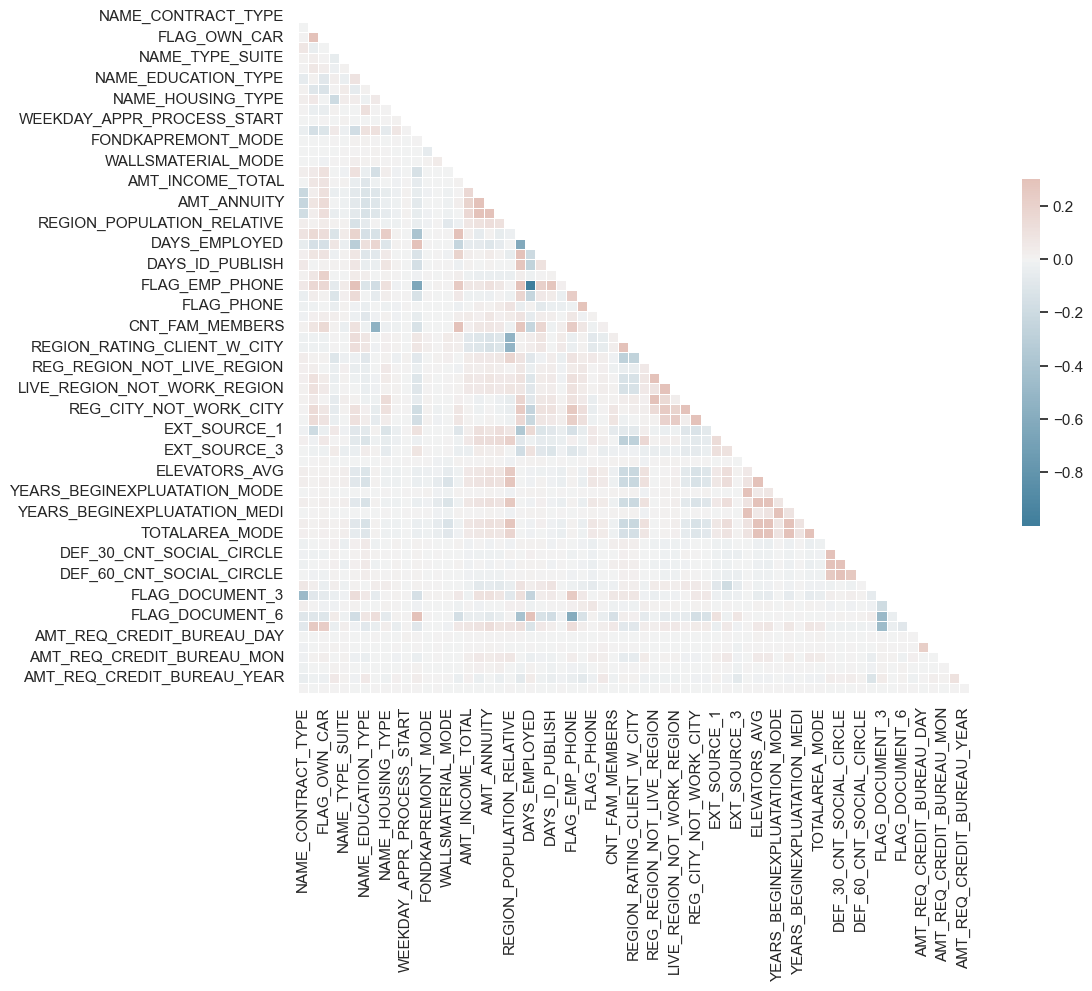

In [26]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_train_ok.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
corr

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
NAME_CONTRACT_TYPE,1.000000,-0.008529,0.004137,0.067110,0.012084,0.005439,-0.065067,0.011291,0.024187,0.001644,...,-0.479906,0.029461,-0.098780,-0.084922,-0.004922,-0.014655,-0.014232,-0.021483,-0.049714,0.001669
CODE_GENDER,-0.008529,1.000000,0.345811,-0.044377,0.029918,0.065075,0.009589,-0.099749,0.058739,-0.038121,...,-0.087179,0.003345,-0.100734,0.249396,0.000423,-0.002848,0.005676,-0.009614,-0.020592,-0.000796
FLAG_OWN_CAR,0.004137,0.345811,1.000000,-0.002780,0.004058,0.033216,-0.094014,-0.130998,-0.004181,-0.043717,...,-0.069955,-0.013634,-0.106125,0.228280,0.001346,0.002774,0.023385,-0.003938,-0.026110,0.001117
FLAG_OWN_REALTY,0.067110,-0.044377,-0.002780,1.000000,-0.050447,-0.026618,0.021939,0.000695,-0.199733,0.009927,...,-0.036902,-0.011834,0.041598,-0.035049,-0.009120,0.005798,-0.006314,0.011982,0.058554,0.000648
NAME_TYPE_SUITE,0.012084,0.029918,0.004058,-0.050447,1.000000,0.007266,-0.036626,0.037208,0.032263,-0.003757,...,-0.013698,0.004718,-0.019263,0.020886,0.002939,0.003481,0.011620,0.004759,0.011608,0.000879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,-0.014655,-0.002848,0.002774,0.005798,0.003481,-0.003702,-0.000068,-0.002926,-0.005700,0.004715,...,0.008359,0.001851,0.002491,0.000772,0.218943,1.000000,-0.007387,-0.007405,0.029288,0.001838
AMT_REQ_CREDIT_BUREAU_MON,-0.014232,0.005676,0.023385,-0.006314,0.011620,-0.026127,-0.034912,-0.008291,-0.006536,-0.011321,...,0.010867,0.006309,-0.021885,0.018236,-0.002765,-0.007387,1.000000,0.005250,0.013552,0.000298
AMT_REQ_CREDIT_BUREAU_QRT,-0.021483,-0.009614,-0.003938,0.011982,0.004759,-0.004901,0.000029,-0.001989,-0.008097,-0.000219,...,0.010152,-0.004086,0.009409,-0.002368,-0.001533,-0.007405,0.005250,1.000000,0.095626,0.000880
AMT_REQ_CREDIT_BUREAU_YEAR,-0.049714,-0.020592,-0.026110,0.058554,0.011608,-0.011780,0.057585,-0.004460,-0.015141,0.016975,...,0.046076,-0.009336,0.011191,-0.021524,0.000686,0.029288,0.013552,0.095626,1.000000,0.003925


In [28]:
threshold = 0.87

# Identifier les couples corrélés
correlated_variables = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            variable_name = corr.columns[i]
            correlated_variables.add((variable_name, corr.index[j]))
print("Couples corrélés :")
for pair in correlated_variables:
    print(pair)

Couples corrélés :
('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('FLOORSMAX_MEDI', 'FLOORSMAX_MODE')
('FLOORSMAX_MODE', 'FLOORSMAX_AVG')
('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE')
('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG')
('FLAG_EMP_PHONE', 'DAYS_EMPLOYED')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('FLOORSMAX_MEDI', 'FLOORSMAX_AVG')


In [29]:
var_supprimer = set(pd.DataFrame(correlated_variables)[0])
len(var_supprimer)

9

In [30]:
X_train = df_train_ok.drop(columns = var_supprimer)

In [31]:
X_train.shape

(306511, 57)

In [32]:
X_test = tmp_test_2[list(X_train.columns)]

In [33]:
for col in X_train.columns:
    if X_train[col].dtype == 'float64':
        X_train[col] = X_train[col].astype('float32')
for col in X_train.columns:
    if X_train[col].dtype == 'int64':
        X_train[col] = X_train[col].astype('int32')
        
for col in X_test.columns:
    if X_test[col].dtype == 'float64':
        X_test[col] = X_test[col].astype('float32')
for col in X_test.columns:
    if X_test[col].dtype == 'int64':
        X_test[col] = X_test[col].astype('int32')

C:\Users\lcatteau\AppData\Local\Temp\ipykernel_29552\581397780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('float32')
C:\Users\lcatteau\AppData\Local\Temp\ipykernel_29552\581397780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('int32')


In [34]:
X_test = X_test.set_index('SK_ID_CURR')
X_train = X_train.set_index('SK_ID_CURR')

In [35]:
colonnes = X_train.columns

# Classification

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import time
import shap

In [37]:
start = time.time()
# Définir le modèle 
lightgbm = lgb.LGBMClassifier(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {'boosting_type' : ['gbdt'], 
              'num_leaves' : [5, 10, 31,4, 5],
              'max_depth' : [-1, 0, 10, 20], 
              'learning_rate' : [0.1, 0.5, 0.7]
              #n_estimators=100
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(lightgbm, param_grid, cv=5, scoring='roc_auc', verbose=5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)
temps = time.time() - start
print(temps)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.750 total time=   1.8s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c

[CV 3/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=-1, num_leaves=31;, score=0.752 total time=   3.9s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 4/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=-1, num_leaves=31;, score=0.752 total time=   3.8s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065428 seconds.
You can set `force_row_wise=true` to rem

[CV 1/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=0, num_leaves=5;, score=0.750 total time=   2.1s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3936
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 2/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=0, num_leaves=5;, score=0.750 total time=   2.3s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087833 seconds.
You can set `force_row_wise=true` to remove 

[CV 4/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=0, num_leaves=31;, score=0.752 total time=   3.7s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3937
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 5/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=0, num_leaves=31;, score=0.753 total time=   3.2s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049666 seconds.
You can set `force_row_wise=true` to remov

[CV 2/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.750 total time=   2.1s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.746 total time=   2.2s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060473 seconds.
You can set `force_row_wise=true` to remov

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, num_leaves=31;, score=0.752 total time=   2.7s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0

[CV 4/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.747 total time=   3.1s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3937
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 5/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.747 total time=   1.8s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047908 seconds.
You can set `force_row_wise=true` to remov

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=20, num_leaves=31;, score=0.756 total time=   2.6s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3936
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0

[CV 1/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=20, num_leaves=5;, score=0.750 total time=   1.9s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3936
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 2/5] END boosting_type=gbdt, learning_rate=0.1, max_depth=20, num_leaves=5;, score=0.750 total time=   2.0s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044793 seconds.
You can set `force_row_wise=true` to remov

[CV 4/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=-1, num_leaves=10;, score=0.746 total time=   1.8s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3937
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 5/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=-1, num_leaves=10;, score=0.744 total time=   2.0s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077536 seconds.
You can set `force_row_wise=true` to rem

[CV 2/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=-1, num_leaves=5;, score=0.751 total time=   1.7s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=-1, num_leaves=5;, score=0.750 total time=   1.7s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045223 seconds.
You can set `force_row_wise=true` to remov

[CV 5/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=0, num_leaves=10;, score=0.744 total time=   2.2s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=0, num_leaves=31;, score=0.735 total time=   2.0s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045279 seconds.
You can set `force_row_wise=true` to remov

[CV 3/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=0, num_leaves=5;, score=0.750 total time=   1.8s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 4/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=0, num_leaves=5;, score=0.747 total time=   1.9s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080891 seconds.
You can set `force_row_wise=true` to remove 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=10, num_leaves=31;, score=0.734 total time=   2.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly 

[CV 5/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=10, num_leaves=4;, score=0.749 total time=   2.6s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=10, num_leaves=5;, score=0.752 total time=   2.0s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059512 seconds.
You can set `force_row_wise=true` to remov

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=20, num_leaves=10;, score=0.744 total time=   3.1s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 245209, num

[CV 2/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=20, num_leaves=4;, score=0.753 total time=   2.1s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.5, max_depth=20, num_leaves=4;, score=0.750 total time=   2.0s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062370 seconds.
You can set `force_row_wise=true` to remov

[CV 5/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=-1, num_leaves=5;, score=0.745 total time=   2.0s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=-1, num_leaves=10;, score=0.738 total time=   1.7s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042176 seconds.
You can set `force_row_wise=true` to remo

[CV 3/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=-1, num_leaves=4;, score=0.749 total time=   2.5s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 4/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=-1, num_leaves=4;, score=0.747 total time=   1.7s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050807 seconds.
You can set `force_row_wise=true` to remov

[CV 1/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=0, num_leaves=10;, score=0.738 total time=   1.7s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3936
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 2/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=0, num_leaves=10;, score=0.741 total time=   1.8s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040470 seconds.
You can set `force_row_wise=true` to remov

[CV 4/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=0, num_leaves=4;, score=0.747 total time=   1.6s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3937
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 5/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=0, num_leaves=4;, score=0.747 total time=   1.6s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046539 seconds.
You can set `force_row_wise=true` to remove 

[CV 2/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=10, num_leaves=10;, score=0.741 total time=   1.8s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=10, num_leaves=10;, score=0.737 total time=   2.0s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080405 seconds.
You can set `force_row_wise=true` to rem

[CV 2/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=10, num_leaves=4;, score=0.751 total time=   1.6s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3932
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 3/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=10, num_leaves=4;, score=0.749 total time=   1.6s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046159 seconds.
You can set `force_row_wise=true` to remov

[CV 5/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=20, num_leaves=5;, score=0.745 total time=   1.7s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=20, num_leaves=10;, score=0.738 total time=   1.8s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045531 seconds.
You can set `force_row_wise=true` to remo

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 5/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=20, num_leaves=31;, score=0.711 total time=   2.9s
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV 1/5] END boosting_type=gbdt, learning_rate=0.7, max_depth=20, num_leaves=4;, score=0.752 total time=   1.6s
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Inf

In [38]:
grid_search.best_score_, grid_search.best_params_

(0.7537277778772452,
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': -1,
  'num_leaves': 31})

In [39]:
grid_search.best_estimator_.score(X_test, y_test)

0.695

<AxesSubplot:>

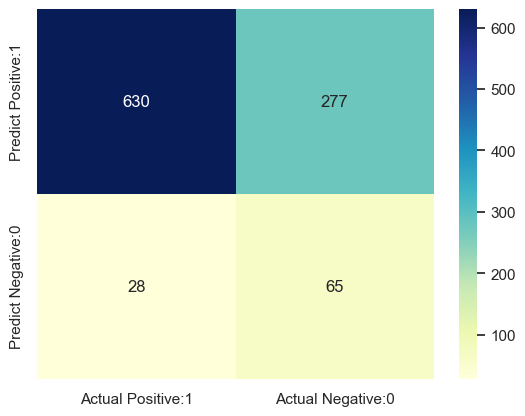

In [40]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [41]:
Précision = 637/(637+270)
Précision

0.7023153252480706

In [42]:
df_pred = pd.DataFrame(grid_search.predict_proba(X_test))
def prediction(row):
    if row[1]>=0.75 :
         return 1
    else :
        return 0

df_pred['pred_reel'] = df_pred.apply(lambda row : prediction(row),axis=1)

<AxesSubplot:>

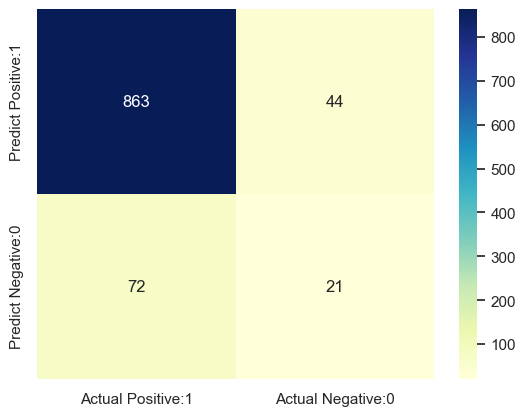

In [43]:
cm = confusion_matrix(y_test, df_pred['pred_reel'])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [44]:
Précision2 = 862/(862+45)
Précision2

0.9503858875413451

In [45]:
type(grid_search.best_estimator_.booster_)
shap_values = shap.TreeExplainer(grid_search.best_estimator_.booster_).shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


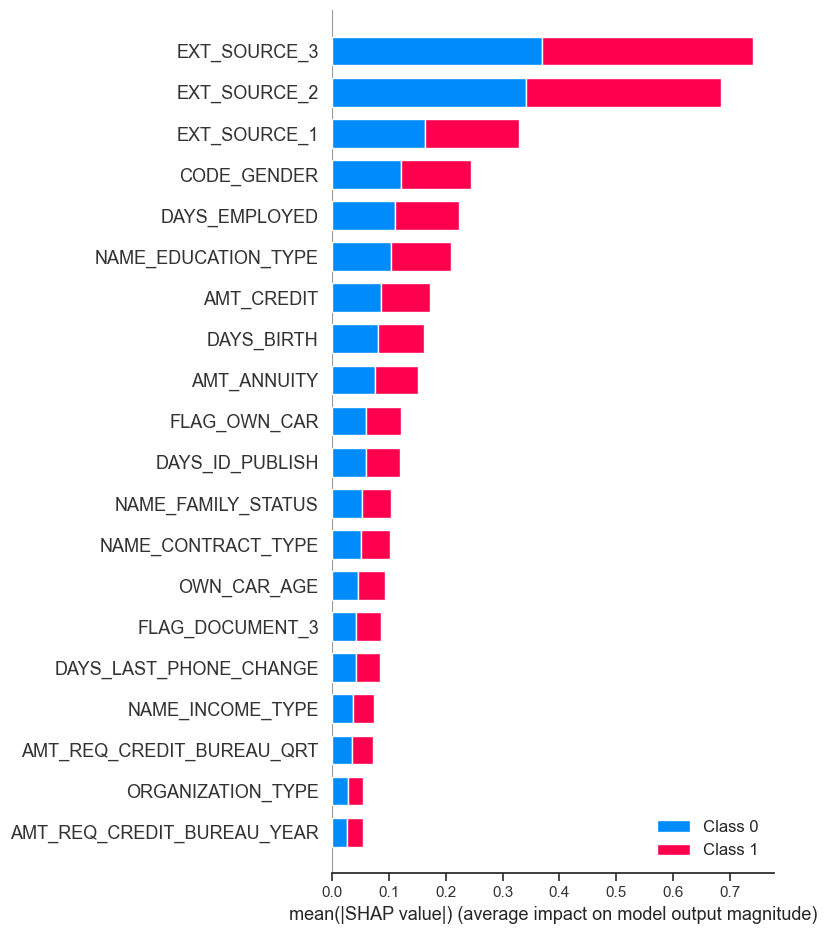

In [46]:
shap.summary_plot(shap_values, X_train)

In [47]:
shap_values

[array([[-0.01044461,  0.14549317, -0.04075768, ..., -0.00781755,
         -0.01290384, -0.01339662],
        [-0.03162796,  0.09547261, -0.03725806, ..., -0.00252162,
         -0.03184823, -0.00439623],
        [-0.02675063,  0.10229843, -0.04042083, ...,  0.05513771,
         -0.03144079,  0.03219215],
        ...,
        [-0.05779423, -0.11985062,  0.07002964, ...,  0.02420367,
         -0.0363126 , -0.00665458],
        [ 0.25951247, -0.09293169,  0.07279659, ..., -0.00326049,
         -0.00814551,  0.00348063],
        [-0.03269127, -0.10524349,  0.08019524, ...,  0.01137324,
         -0.02135619,  0.03364697]]),
 array([[ 0.01044461, -0.14549317,  0.04075768, ...,  0.00781755,
          0.01290384,  0.01339662],
        [ 0.03162796, -0.09547261,  0.03725806, ...,  0.00252162,
          0.03184823,  0.00439623],
        [ 0.02675063, -0.10229843,  0.04042083, ..., -0.05513771,
          0.03144079, -0.03219215],
        ...,
        [ 0.05779423,  0.11985062, -0.07002964, ..., -

# Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from lightgbm import LGBMClassifier  # Assurez-vous d'avoir correctement importé LGBMClassifier

In [49]:
pipeline = Pipeline([
    ('classifier', LGBMClassifier(**grid_search.best_params_))  # Assurez-vous que grid_search.best_params_ est correct
])

In [50]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 24732, number of negative: 281779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 306511, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080689 -> initscore=-2.433025
[LightGBM] [Info] Start training from score -2.433025


Pipeline(steps=[('classifier', LGBMClassifier())])

In [51]:
pipeline.score(X_test, y_test)

0.905

In [52]:
import joblib

In [53]:
joblib.dump(pipeline, 'pipeline_classifier.pkl')
joblib.dump(pipeline_enc, 'pipeline_encod.pkl')
joblib.dump(pipeline_scal, 'pipeline_scaler.pkl')

['pipeline_scaler.pkl']

In [54]:
var_num_train.remove('SK_ID_CURR')

In [55]:
joblib.dump(var_cat, 'var_cat.pkl')
joblib.dump(var_num_train, 'var_num.pkl')
joblib.dump(shap_values, 'shap_values.pkl')
joblib.dump(colonnes, 'colonnes.pkl')


['colonnes.pkl']

In [56]:
joblib.dump(var_num_train, 'var_num.pkl')


['var_num.pkl']

In [57]:
joblib.dump(dict_imputer, 'dict_imputer.plk')

['dict_imputer.plk']

In [75]:
X_test.to_csv('data_.csv') 
y_test.to_csv('target.csv') 
X_train.head(1000).to_csv('X_train.csv') 
y_train.to_csv('y_train.csv') 